In [43]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim


In [44]:
START = "2022-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [45]:
data = load_data('NVDA')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2022-01-03,30.073059,30.121000,30.711000,29.785000,29.815001,391547000
1,2022-01-04,29.243387,29.290001,30.468000,28.349001,30.277000,527154000
2,2022-01-05,27.560068,27.604000,29.416000,27.533001,28.948999,498064000
3,2022-01-06,28.133154,28.177999,28.438000,27.065001,27.639999,454186000
4,2022-01-07,27.203636,27.247000,28.422001,27.056999,28.141001,409939000


In [46]:
df.columns = df.columns.droplevel(1)
df.set_index('Date', inplace=True)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.reset_index(inplace=True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Close,High,Low,Open,Volume
0,30.121000,30.711000,29.785000,29.815001,391547000
1,29.290001,30.468000,28.349001,30.277000,527154000
2,27.604000,29.416000,27.533001,28.948999,498064000
3,28.177999,28.438000,27.065001,27.639999,454186000
4,27.247000,28.422001,27.056999,28.141001,409939000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   731 non-null    float64
 1   High    731 non-null    float64
 2   Low     731 non-null    float64
 3   Open    731 non-null    float64
 4   Volume  731 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 28.7 KB


In [48]:
df.describe()

,Close,High,Low,Open,Volume
count,731.000000,731.000000,731.000000,731.000000,7.310000e+02
mean,51.922420,52.903475,50.852565,51.928536,4.727613e+08
std,40.232975,40.985419,39.444546,40.317938,1.622227e+08
min,11.227000,11.735000,10.813000,10.971000,1.575936e+08
25%,19.240000,19.653000,18.639501,19.110500,3.702750e+08
50%,40.779999,41.765999,40.014999,40.660000,4.541860e+08
75%,82.836502,85.161999,80.759499,83.872002,5.533482e+08
max,148.880005,152.889999,146.259995,149.350006,1.543911e+09


In [49]:
df

,Close,High,Low,Open,Volume
0,30.121000,30.711000,29.785000,29.815001,391547000
1,29.290001,30.468000,28.349001,30.277000,527154000
2,27.604000,29.416000,27.533001,28.948999,498064000
3,28.177999,28.438000,27.065001,27.639999,454186000
4,27.247000,28.422001,27.056999,28.141001,409939000
...,...,...,...,...,...
726,146.669998,152.889999,140.699997,149.350006,400946600
727,141.949997,147.160004,141.100006,145.929993,236406200
728,136.020004,142.050003,135.820007,141.990005,344941900
729,136.919998,139.300003,135.669998,137.699997,190287700


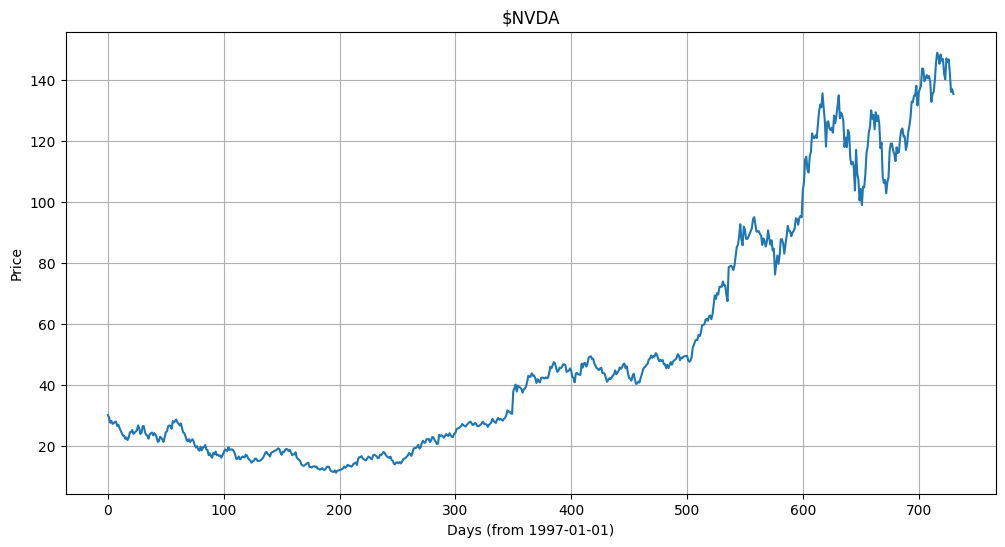

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("$NVDA")
plt.xlabel("Days (from 1997-01-01)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [51]:
ma100 = df.Close.rolling(10).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
726    145.590997
727    145.022997
728    144.098997
729    142.961998
730    141.868997
Name: Close, Length: 731, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

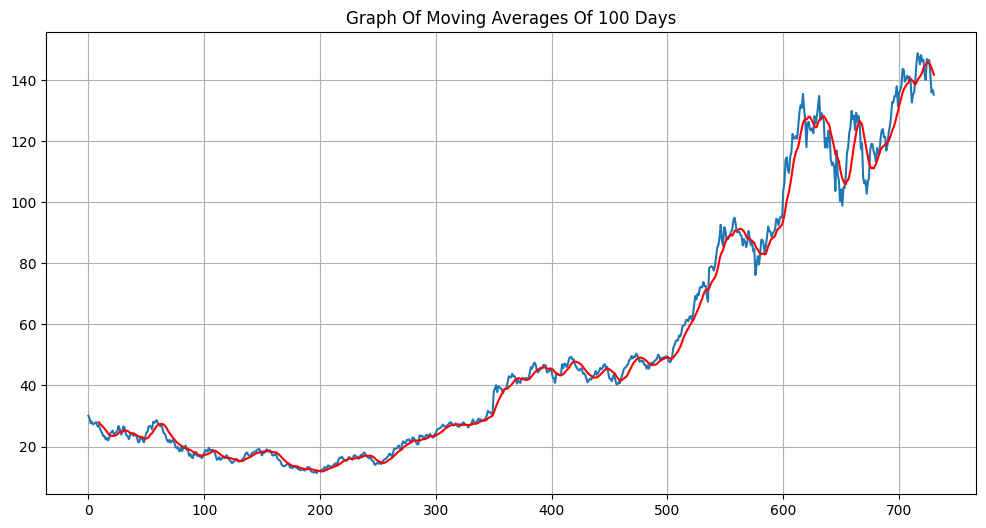

In [52]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [53]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(511, 7)
(220, 7)


In [54]:
train.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-01-03,30.073059,30.121000,30.711000,29.785000,29.815001,391547000
1,2022-01-04,29.243387,29.290001,30.468000,28.349001,30.277000,527154000
2,2022-01-05,27.560068,27.604000,29.416000,27.533001,28.948999,498064000
3,2022-01-06,28.133154,28.177999,28.438000,27.065001,27.639999,454186000
4,2022-01-07,27.203636,27.247000,28.422001,27.056999,28.141001,409939000


In [55]:
test.head()

,Date,Adj Close,Close,High,Low,Open,Volume
511,2024-01-17,56.040974,56.053001,56.471001,54.740002,56.347000,474394000
512,2024-01-18,57.094749,57.106998,57.599998,56.106998,57.259998,491650000
513,2024-01-19,59.478237,59.491001,59.500000,57.224998,57.988998,543501000
514,2024-01-22,59.641201,59.653999,60.331001,59.070000,60.049000,452955000
515,2024-01-23,59.860157,59.873001,59.910000,58.584999,59.570000,294654000


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [57]:
train_close = train.iloc[:, 2:3].values
test_close = test.iloc[:, 2:3].values
train_close, test_close

(array([[30.12100029],
        [29.29000092],
        [27.60400009],
        [28.1779995 ],
        [27.24699974],
        [27.39999962],
        [27.81699944],
        [27.99900055],
        [26.57500076],
        [26.94199944],
        [25.90299988],
        [25.06699944],
        [24.14999962],
        [23.37400055],
        [23.37199974],
        [22.3239994 ],
        [22.77199936],
        [21.94400024],
        [22.84000015],
        [24.48600006],
        [24.63800049],
        [25.24200058],
        [23.94799995],
        [24.31900024],
        [24.72800064],
        [25.1079998 ],
        [26.70499992],
        [25.8239994 ],
        [23.9489994 ],
        [24.2670002 ],
        [26.49500084],
        [26.51099968],
        [24.50699997],
        [23.6420002 ],
        [23.38999939],
        [22.38699913],
        [23.74799919],
        [24.15699959],
        [24.38500023],
        [23.47699928],
        [24.21999931],
        [23.7140007 ],
        [22.93600082],
        [21

In [58]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.41842543],
       [0.40002216],
       [0.36268409],
       [0.37539584],
       [0.35477798],
       [0.3581663 ],
       [0.36740116],
       [0.37143174],
       [0.33989593],
       [0.34802346],
       [0.32501384],
       [0.30649982],
       [0.28619199],
       [0.26900676],
       [0.26896245],
       [0.2457535 ],
       [0.25567488],
       [0.23733806],
       [0.25718082],
       [0.29363304],
       [0.29699923],
       [0.31037538],
       [0.28171852],
       [0.28993467],
       [0.29899237],
       [0.30740781],
       [0.34277488],
       [0.3232643 ],
       [0.28174065],
       [0.28878308],
       [0.33812425],
       [0.33847856],
       [0.2940981 ],
       [0.27494187],
       [0.26936107],
       [0.24714869],
       [0.27728932],
       [0.28634701],
       [0.2913963 ],
       [0.27128777],
       [0.2877422 ],
       [0.27653639],
       [0.25930685],
       [0.22422764],
       [0.2278153 ],
       [0.26103421],
       [0.25315028],
       [0.240

In [59]:
x_train = []
y_train = [] 

for i in range(10, data_training_array.shape[0]):
    x_train.append(data_training_array[i-10: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [60]:
x_train.shape

(501, 10, 1)

In [61]:

class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=1, hidden_size=20, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        
        self.lstm2 = nn.LSTM(input_size=20, hidden_size=20, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)
        
        self.lstm3 = nn.LSTM(input_size=20, hidden_size=20, batch_first=True)
        self.dropout3 = nn.Dropout(0.4)
        
        self.lstm4 = nn.LSTM(input_size=20, hidden_size=60, batch_first=True)
        self.dropout4 = nn.Dropout(0.5)
        
        self.fc = nn.Linear(60, 1)
        
    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        
        x, _ = self.lstm3(x)
        x = self.dropout3(x)
        
        x, _ = self.lstm4(x)
        x = self.dropout4(x)
        
        x = x[:, -1, :]  
        x = self.fc(x)
        return x


In [62]:
model = LSTMModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
torch.save(model.state_dict(), "../models/lstm_model_v3.pth")


Epoch 1/5, Loss: 0.16315852105617523
Epoch 2/5, Loss: 0.1503366082906723
Epoch 3/5, Loss: 0.14095374941825867
Epoch 4/5, Loss: 0.13298705220222473
Epoch 5/5, Loss: 0.12473108619451523


/home/ishan/miniconda3/envs/stocks_py310/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([501])) that is different to the input size (torch.Size([501, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [63]:
past_100_days = pd.DataFrame(train_close[-10:])
test_df = pd.DataFrame(test_close)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
final_df.head()

,0
0,48.167999
1,47.569000
2,47.998001
3,49.097000
4,52.252998


In [64]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00591248],
       [0.        ],
       [0.00423449],
       [0.01508227],
       [0.04623385],
       [0.05498908],
       [0.06693249],
       [0.07159142],
       [0.07048591],
       [0.08698956],
       [0.08374215],
       [0.09414573],
       [0.11767725],
       [0.11928614],
       [0.12144782],
       [0.13614512],
       [0.13866214],
       [0.13287794],
       [0.1470324 ],
       [0.15008239],
       [0.13777378],
       [0.15257968],
       [0.18350428],
       [0.21481379],
       [0.20386728],
       [0.22238452],
       [0.21786378],
       [0.24246135],
       [0.24359645],
       [0.24241195],
       [0.25990268],
       [0.24764335],
       [0.24719919],
       [0.21599828],
       [0.19645447],
       [0.30568251],
       [0.3084364 ],
       [0.31115082],
       [0.30729136],
       [0.29704573],
       [0.3113482 ],
       [0.34260838],
       [0.3718056 ],
       [0.3789815 ],
       [0.40598745],
       [0.44516387],
       [0.39441914],
       [0.377

In [65]:
model = LSTMModel()
model.load_state_dict(torch.load("../models/lstm_model_v3.pth"))
model.eval()

/tmp/ipykernel_253400/567630396.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../models/lstm_model_v3.pth"))


LSTMModel(
  (lstm1): LSTM(1, 20, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(20, 20, batch_first=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (lstm3): LSTM(20, 20, batch_first=True)
  (dropout3): Dropout(p=0.4, inplace=False)
  (lstm4): LSTM(20, 60, batch_first=True)
  (dropout4): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=60, out_features=1, bias=True)
)

In [66]:
x_test = []
y_test = []
for i in range(10, input_data.shape[0]):
   x_test.append(input_data[i-10: i])
   y_test.append(input_data[i, 0])
x_test, y_test = torch.tensor(np.array(x_test), dtype=torch.float32), torch.tensor(np.array(y_test), dtype=torch.float32)
print(x_test.shape)
print(y_test.shape)

torch.Size([220, 10, 1])
torch.Size([220])


In [67]:
y_pred = model(x_test)

In [68]:
y_pred.shape

torch.Size([220, 1])

In [69]:
y_test.shape

torch.Size([220])

In [70]:
y_pred = y_pred.detach().numpy() 
y_test = y_test.detach().numpy() 

In [71]:
y_pred = y_pred.squeeze()

In [72]:
y_pred[:5], y_test[:5]

(array([0.18474407, 0.18473575, 0.18472749, 0.18471874, 0.18470979],
       dtype=float32),
 array([0.08374215, 0.09414573, 0.11767726, 0.11928614, 0.12144782],
       dtype=float32))

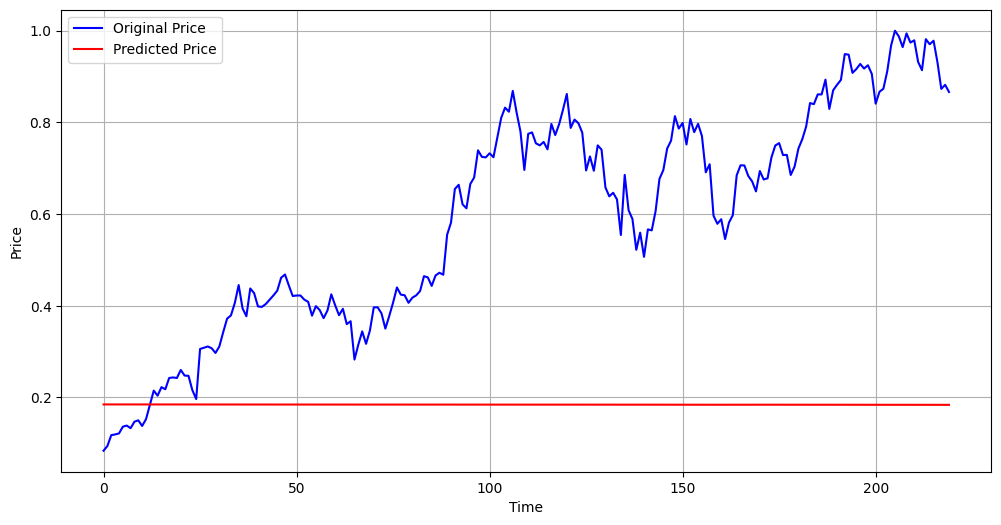

In [73]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()